1. A clustering mechanism to find patterns from submitted topics or requests.
2. A hierarchical clustering method that can produce a hierarchical dendrogram of topics submitted over a period of time.

In [1]:
import pandas as pd, numpy as np, seaborn as sns, tensorflow as tf, matplotlib.pyplot as plt, re, os, codecs, mpld3
from sklearn import feature_extraction
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

pd.options.display.max_rows=None
pd.options.display.max_colwidth=1000

filepath = 'C:/Users/gemin/4B_Cap_data'

C:\Users\gemin\anaconda3\envs\fourthbryan\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\gemin\anaconda3\envs\fourthbryan\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\gemin\anaconda3\envs\fourthbryan\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\gemin\anaconda3\envs\fourthbryan\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gemin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt t

In [2]:
%%time
articles = pd.read_csv(filepath + '/all-the-news-2-1.csv'
#                        , nrows=10000
                      )

<timed exec>:1: DtypeWarning: Columns (1,3,5) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 2min 40s


In [3]:
print(articles.shape)

(2688879, 12)


In [4]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688879 entries, 0 to 2688878
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0.1  int64  
 1   Unnamed: 0    object 
 2   date          object 
 3   year          object 
 4   month         float64
 5   day           object 
 6   author        object 
 7   title         object 
 8   article       object 
 9   url           object 
 10  section       object 
 11  publication   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 246.2+ MB


In [5]:
articles.head(2)

Unnamed: 0.1 Unnamed: 0                 date  year  month day       author  \
0             0          0  2016-12-09 18:31:00  2016   12.0   9  Lee Drutman   
1             1          1  2016-10-07 21:26:46  2016   10.0   7  Scott Davis   

                                                                                    title  \
0                 We should take concerns about the health of liberal democracy seriously   
1  Colts GM Ryan Grigson says Andrew Luck's contract makes it difficult to build the team   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   article  \
0  This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices. Imagine you are an otherwise healthy 30-something who starts feeling weird. You are sometimes short of breath. You get migraines. Your feet start to swell a little. But otherwise, everything seems fine. You go to the doctor. The doctor runs some tests. She tells you, It's probably nothing, but these could be signs of a coming heart attack. You push for more certainty, but the doctor tells you she's not sure. The human body is a complex system. You're young and otherwise pretty healthy. There could be plenty of other explanations for what you're feeling. But it is a little worrying. So just to be on the safe side, maybe you should reduce the stress in your life and eat a healthier diet. What would you do? If you're a sensible person, you'd probably err on the side of precaution. Sure, it might be nothing ...   
1   The Indianapolis Colts made Andrew Luck the highest-paid player in NFL history this offseason with a five-year, $122-million contract with $89 million guaranteed. However, they're already finding that Luck's contract is inhibiting their ability to address weaknesses on other parts of the roster, particularly on defense. On Friday, Colts GM Ryan Grigson, who is under fire for the Colts 1-3 start, said that it's difficult to build up the team's defense with Luck making so much money. According to Keefer, Grigson did point out that the Colts still have young talent they're hoping to develop on defense. However, blaming Luck's contract — which the Colts gave him — for having a weak defense (30th in defensive DVOA) is not accurate. As others have pointed out, last year's Denver Broncos paid Peyton Manning $15 million in base salary while also boasting an elite defense. Luck also takes up $18.4 million against the salary cap this year, less than $1 million more than Manning did a year a...   

                                                                                  url  \
0            https://www.vox.com/polyarchy/2016/12/9/13898340/democracy-warning-signs   
1  https://www.businessinsider.com/colts-gm-ryan-grigson-andrew-luck-contract-2016-10   

  section       publication  
0     NaN               Vox  
1     NaN  Business Insider

In [6]:
print(articles['title'].isnull().sum().sum())
print(articles['article'].isnull().sum().sum())
print(articles['section'].isnull().sum().sum())

38
104714
912274


In [7]:
%%time
articles['title_clean'] = articles.title.fillna('None')
articles['article_clean'] = articles.article.fillna('None')
articles['section_clean'] = articles.section.fillna('None')

print(articles['title_clean'].isnull().sum().sum())
print(articles['article_clean'].isnull().sum().sum())
print(articles['section_clean'].isnull().sum().sum())

0
0
0
Wall time: 1.75 s


In [8]:
%%time
articles['title_clean'] = articles.title_clean.str.lower()
articles['article_clean'] = articles.article_clean.str.lower()
articles['section_clean'] = articles.section_clean.str.lower()

Wall time: 4min 27s


In [9]:
%%time
articles['title_clean'] = articles['title_clean'].str.replace('[^a-zA-Z]', ' ')
articles['article_clean'] = articles['article_clean'].str.replace('[^a-zA-Z]', ' ')
articles['section_clean'] = articles['section_clean'].str.replace('[^a-zA-Z]', ' ')

<timed exec>:1: FutureWarning: The default value of regex will change from True to False in a future version.
<timed exec>:2: FutureWarning: The default value of regex will change from True to False in a future version.
<timed exec>:3: FutureWarning: The default value of regex will change from True to False in a future version.


Wall time: 12min 7s


In [10]:
articles[['title_clean','article_clean','section_clean']].head(3)

title_clean  \
0                 we should take concerns about the health of liberal democracy seriously   
1  colts gm ryan grigson says andrew luck s contract makes it difficult to build the team   
2                                            trump denies report he ordered mueller fired   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             article_clean  \
0  this post is part of polyarchy  an independent blog produced by the political reform program at new america  a washington think tank devoted to developing new ideas and new voices  imagine you are an otherwise healthy    something who starts feeling weird  you are sometimes short of breath  you get migraines  your feet start to swell a little  but otherwise  everything seems fine  you go to the doctor  the doctor runs some tests  she tells you  it s probably nothing  but these could be signs of a coming heart attack  you push for more certainty  but the doctor tells you she s not sure  the human body is a complex system  you re young and otherwise pretty healthy  there could be plenty of other explanations for what you re feeling  but it is a little worrying  so just to be on the safe side  maybe you should reduce the stress in your life and eat a healthier diet  what would you do  if you re a sensible person  you d probably err on the side of precaution  sure  it might be nothing ...   
1   the indianapolis colts made andrew luck the highest paid player in nfl history this offseason with a five year       million contract with     million guaranteed  however  they re already finding that luck s contract is inhibiting their ability to address weaknesses on other parts of the roster  particularly on defense  on friday  colts gm ryan grigson  who is under fire for the colts     start  said that it s difficult to build up the team s defense with luck making so much money  according to keefer  grigson did point out that the colts still have young talent they re hoping to develop on defense  however  blaming luck s contract   which the colts gave him   for having a weak defense    th in defensive dvoa  is not accurate  as others have pointed out  last year s denver broncos paid peyton manning     million in base salary while also boasting an elite defense  luck also takes up       million against the salary cap this year  less than    million more than manning did a year a...   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     davos  switzerland  reuters    u s  president donald trump denied a report on friday that he had ordered special counsel robert mueller fired last june  calling it  fake news    the new

In [28]:
%%time
articles['title_clean'] = articles['title_clean'].apply(lambda x: ' '.join(x for x in x.split() if len(x) >= 2))
articles['article_clean'] = articles['article_clean'].apply(lambda x: ' '.join(x for x in x.split() if len(x) >= 2))

Wall time: 9min 52s


In [29]:
articles[['section','section_clean','title','title_clean','article','article_clean']].head(3)

section section_clean  \
0     NaN          none   
1     NaN          none   
2   Davos         davos   

                                                                                    title  \
0                 We should take concerns about the health of liberal democracy seriously   
1  Colts GM Ryan Grigson says Andrew Luck's contract makes it difficult to build the team   
2                                            Trump denies report he ordered Mueller fired   

                                                                            title_clean  \
0               we should take concerns about the health of liberal democracy seriously   
1  colts gm ryan grigson says andrew luck contract makes it difficult to build the team   
2                                          trump denies report he ordered mueller fired   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   article  \
0  This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices. Imagine you are an otherwise healthy 30-something who starts feeling weird. You are sometimes short of breath. You get migraines. Your feet start to swell a little. But otherwise, everything seems fine. You go to the doctor. The doctor runs some tests. She tells you, It's probably nothing, but these could be signs of a coming heart attack. You push for more certainty, but the doctor tells you she's not sure. The human body is a complex system. You're young and otherwise pretty healthy. There could be plenty of other explanations for what you're feeling. But it is a little worrying. So just to be on the safe side, maybe you should reduce the stress in your life and eat a healthier diet. What would you do? If you're a sensible person, you'd probably err on the side of precaution. Sure, it might be nothing ...   
1   The Indianapolis Colts made Andrew Luck the highest-paid player in NFL history this offseason with a five-year, $122-million contract with $89 million guaranteed. However, they're already finding that Luck's contract is inhibiting their ability to address weaknesses on other parts of the roster, particularly on defense. On Friday, Colts GM Ryan Grigson, who is under fire for the Colts 1-3 start, said that it's difficult to build up the team's defense with Luck making so much money. According to Keefer, Grigson did point out that the Colts still have young talent they're hoping to develop on defense. However, blaming Luck's contract — which the Colts gave him — for having a weak defense (30th in defensive DVOA) is not accurate. As others have pointed out, last year's Denver Broncos paid Peyton Manning $15 million in base salary while also boasting an elite defense. Luck also takes up $18.4 million against the salary cap this year, less than $1 million more than Manning did a year a...   
2                                                                                                                                        

In [40]:
print(len(articles))
print(articles.section_clean.value_counts(normalize=True).sort_values(ascending=False).nlargest(100)*100)

2688879
none                                        33.927670
market news                                  4.043469
world news                                   4.040755
business news                                3.584951
politics                                     3.258681
wires                                        2.504836
financials                                   2.151268
us                                           1.928648
intel                                        1.480357
bonds news                                   1.475410
sports                                       1.306567
world                                        1.164835
healthcare                                   1.148917
opinion                                      1.047128
consumer goods and retail                    0.995433
sports news                                  0.978995
business                                     0.967652
tv                                           0.927413
tech                

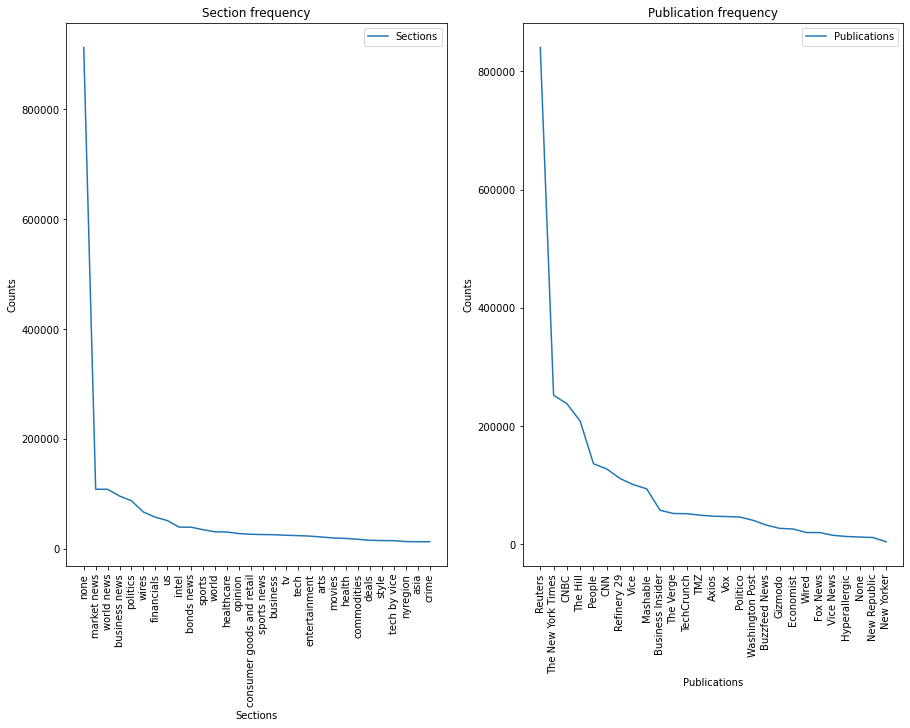

Wall time: 10.6 s


In [32]:
%%time
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
plt.plot(articles.section_clean.value_counts().nlargest(30), label='Sections')
plt.xlabel('Sections')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('Section frequency')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.plot(articles.publication.fillna('None').value_counts().nlargest(30), label='Publications')
plt.xlabel('Publications')
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title('Publication frequency')
plt.legend()
plt.show()

In [70]:
## Not much reduced
articles[['section_clean','title_clean', 'article_clean', 'date']].to_csv(filepath + '/cleaned_data.csv')

In [34]:
health_tech = articles[articles['section_clean'].str.contains('|'.join(['health','tech']))][['section_clean','title_clean', 'article_clean', 'date']]
print('Health or Tech included : ', len(health_tech))
print('Health or Tech dims :', health_tech.shape)
health_tech.head(5)

Health or Tech included :  129682
Health or Tech dims : (129682, 4)


section_clean  \
7             health   
41      tech by vice   
59   technology news   
84   technology news   
107     tech by vice   

                                                                title_clean  \
7                          you can trick your brain into being more focused   
41                  trash geyser spews garbage in yellowstone national park   
59    hungary has no evidence of huawei threat plans rapid rollout minister   
84   philippines globe telecoms launches service backed by huawei equipment   
107                               twitter verification has always been mess   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               article_clean  \
7    if only every day could be like this you can put your finger on why maybe you had just the right amount of sleep maybe the stars are somehow aligned in your favor whatever the reason you re cooking on gas hours fly by like minutes you re feeling great and before you know it it pm and your to do list is done this feeling of flow or being in the zone is something that most of us have experienced at some point or other although not as often as we might like it mental state that elite athletes seem to have at their beck and call for us mere mortals though it hardly ever shows up when we need it since the psychologist mih ly cs kszentmih lyi first described the zone which he called flow in neuroscientists have been trying to figure out what it is and how to make it show up on demand yet as they close in on the secrets of the zone another truth has emerged what we think of as the zone is actually one of many mental states that person can be in each of which works for particular kind of t...   
41   geyser eruptions are known as one of the most beautiful events to occur in nature not anymore on september yellowstone park ear spring geyser erupted belching not just rocks and scalding hot water into the air but dozens of pieces of human trash that were cooked for decades in incredibly hot water nice the national park service shared picture of some of the artifacts recovered which it claims are clearly historic and may end up in yellowstone archives the picture clearly shows baby pacifier solo jazz cup plastic spoon and some sort of tablet like electronic device destroyed beyond recognition there also seems to be large slab of concrete or cinder block foreign objects can damage hot springs and geysers representatives from the national park service said in facebook post you can help by never throwing anything into yellowstone thermal features you would think it goes without saying but yes please do not hurl your trash into scalding hot spring in the largest national park in the co...   
59   budapest reuters hungary has no evidence that equipment from chinese telecoms giant huawei poses security threat government minister said on thursday adding that budapest was mulling incentives to accelerate the rollout of high speed network the united states and some of its western allies believe huawei technologies equipment could be used for espionage a

In [35]:
health_tech['num_words_per_article'] = health_tech['article_clean'].apply(lambda x: len(x.split()))
print(health_tech['num_words_per_article'].describe())

count    129682.000000
mean        452.793379
std         485.581067
min           1.000000
25%         110.000000
50%         341.000000
75%         611.000000
max       12976.000000
Name: num_words_per_article, dtype: float64


In [36]:
median_words_per_sample = np.median(health_tech['num_words_per_article'])
sw_ratio = health_tech.shape[0] / median_words_per_sample
print(f'Number of Articles / Number of Words per Article Ratio: {int(sw_ratio)}')

Number of Articles / Number of Words per Article Ratio: 380


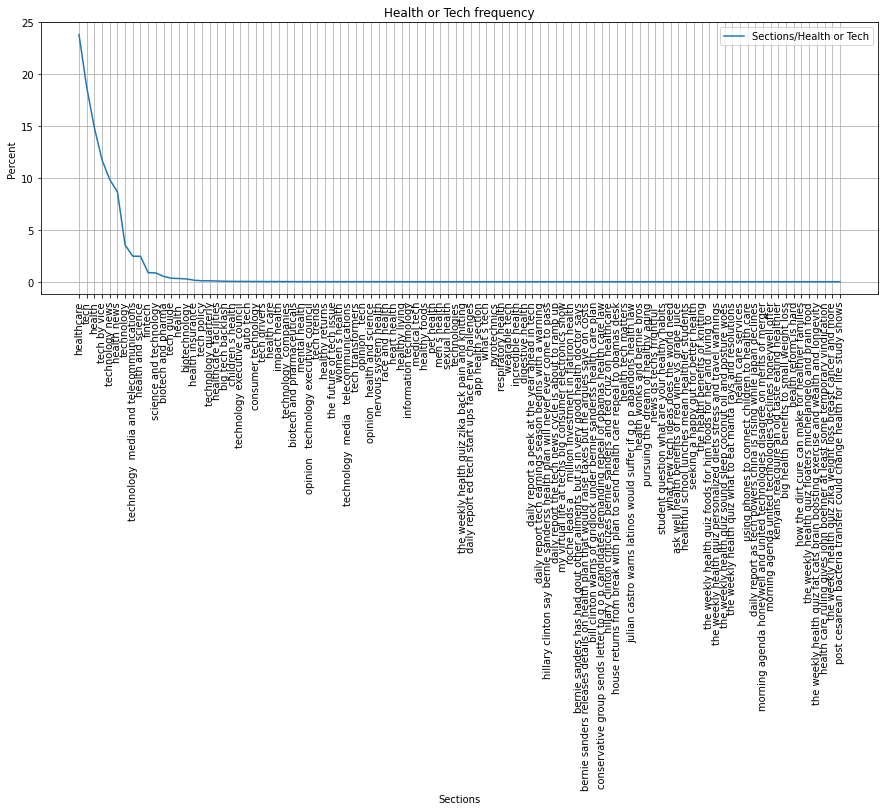

In [43]:
plt.figure(figsize=(15,5))
plt.plot(health_tech.section_clean.value_counts(normalize=True).sort_values(ascending=False).nlargest(100)*100, label='Sections/Health or Tech')
plt.xlabel('Sections')
plt.ylabel('Percent')
plt.xticks(rotation=90)
plt.title('Health or Tech frequency')
plt.legend()
plt.grid()
plt.show()

In [46]:
health_tech.to_csv(filepath+'/health_tech.csv')

# Stopwords, stemming, and tokenizing

In [47]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = SnowballStemmer('english')

In [48]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]    
    stems = [stemmer.stem(t) for t in tokens if t not in stopwords]
    return stems

def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return [t for t in tokens if t not in stopwords] 

In [50]:
sample_article_only = health_tech['article_clean'].values[0]
stemmed = tokenize_and_stem(sample_article_only)

In [51]:
print(sample_article_only)
print('Stemmed length: ',len(stemmed))

if only every day could be like this you can put your finger on why maybe you had just the right amount of sleep maybe the stars are somehow aligned in your favor whatever the reason you re cooking on gas hours fly by like minutes you re feeling great and before you know it it pm and your to do list is done this feeling of flow or being in the zone is something that most of us have experienced at some point or other although not as often as we might like it mental state that elite athletes seem to have at their beck and call for us mere mortals though it hardly ever shows up when we need it since the psychologist mih ly cs kszentmih lyi first described the zone which he called flow in neuroscientists have been trying to figure out what it is and how to make it show up on demand yet as they close in on the secrets of the zone another truth has emerged what we think of as the zone is actually one of many mental states that person can be in each of which works for particular kind of think

In [52]:
stemmed[-20:]

['plastic',
 'brain',
 'one',
 'woman',
 'yearlong',
 'journey',
 'discov',
 'scienc',
 'improv',
 'mind',
 'prometheus',
 'book',
 'sign',
 'newslett',
 'get',
 'best',
 'tonic',
 'deliv',
 'inbox',
 'week']

In [53]:
def totalvocab(text, limit=None):
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    if limit is not None:
        for t in text[:limit]:
            allwords_stemmed = tokenize_and_stem(t)
            totalvocab_stemmed.extend(allwords_stemmed) 

            allwords_tokenized = tokenize_only(t)
            totalvocab_tokenized.extend(allwords_tokenized)
    else:
        for t in text:
            allwords_stemmed = tokenize_and_stem(t)
            totalvocab_stemmed.extend(allwords_stemmed) 

            allwords_tokenized = tokenize_only(t)
            totalvocab_tokenized.extend(allwords_tokenized)
    return totalvocab_stemmed, totalvocab_tokenized

In [55]:
%%time
# totalvocab_stemmed ,totalvocab_tokenized = totalvocab(list(health_tech['article_clean'].values), 1000)
totalvocab_stemmed ,totalvocab_tokenized = totalvocab(list(health_tech['article_clean']))

Wall time: 13min 9s


In [56]:
print(len(totalvocab_tokenized))
print(len(totalvocab_stemmed))

34779098
34779098


In [57]:
%time vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

Wall time: 4.2 s


In [60]:
vocab_frame.head(30)

words
everi       every
day           day
could       could
like         like
put           put
finger     finger
mayb        maybe
right       right
amount     amount
sleep       sleep
mayb        maybe
star        stars
somehow   somehow
align     aligned
favor       favor
whatev   whatever
reason     reason
cook      cooking
gas           gas
hour        hours
fli           fly
like         like
minut     minutes
feel      feeling
great       great
know         know
pm             pm
list         list
done         done
feel      feeling

# Tf-idf and document similarity

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=.5, min_df=10, max_features=200000,
                                   tokenizer=tokenize_and_stem, ngram_range=(1,3))

In [147]:
%time tfidf_matrix = tfidf_vectorizer.fit_transform(health_tech['article_clean'])

Wall time: 14min 36s


In [148]:
print(tfidf_matrix.shape)

(129682, 81)


In [149]:
terms = tfidf_vectorizer.get_feature_names_out()
terms

array(['accord', 'ad', 'also', 'around', 'back', 'base', 'busi', 'call',
       'case', 'chang', 'come', 'compani', 'could', 'coverag', 'data',
       'day', 'develop', 'edit', 'even', 'expect', 'first', 'found',
       'get', 'go', 'group', 'health', 'help', 'high', 'includ',
       'increas', 'last', 'like', 'look', 'made', 'make', 'mani',
       'market', 'may', 'million', 'month', 'much', 'need', 'new', 'one',
       'part', 'peopl', 'percent', 'plan', 'product', 'provid', 'public',
       'recent', 'report', 'research', 'reuter', 'said', 'say', 'see',
       'servic', 'share', 'show', 'sinc', 'sourc', 'start', 'state',
       'still', 'take', 'text', 'time', 'told', 'two', 'unit', 'use',
       'want', 'way', 'week', 'well', 'work', 'world', 'would', 'year'],
      dtype=object)

In [69]:
%%time
from sklearn.metrics.pairwise import cosine_similarity

# Memory issue: Unable to allocate 119. GiB for an array with shape (15912305916,) and data type int64
tfidf_matrix = tfidf_matrix.astype(np.uint8)

dist = 1 - cosine_similarity(tfidf_matrix)

MemoryError: Unable to allocate 118. GiB for an array with shape (15845731989,) and data type int64

In [ ]:
print(dist.shape)
print(dist)

# K-means clustering

In [111]:
rand_state = 42

In [ ]:
%%time
from sklearn.cluster import KMeans

sum_squared = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=rand_state).fit(tfidf_matrix)
    sum_squared.append(kmeans.inertia_)

plt.plot(list(range(2,15)), sum_squared)
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.grid()
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


In [115]:
num_clusters = 10
n_words_per_cluster = 3

In [116]:
%%time
from sklearn.cluster import KMeans

km = KMeans(n_clusters=num_clusters, random_state=rand_state)

# from sklearn.externals import joblib
# joblib.dump(km, 'kmeans_model.pkl')
# km_model = joblib.load('kmeans_model.pkl')

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 12.5 s


In [117]:
health_tech['cluster'] = clusters
health_tech.cluster.value_counts()

0    129628
2        26
1         8
3         6
4         4
5         4
7         3
6         3
Name: cluster, dtype: int64

In [144]:
health_tech[health_tech['cluster']==0]['title_clean'].head()

7                            you can trick your brain into being more focused
41                    trash geyser spews garbage in yellowstone national park
59      hungary has no evidence of huawei threat plans rapid rollout minister
84     philippines globe telecoms launches service backed by huawei equipment
107                                 twitter verification has always been mess
Name: title_clean, dtype: object

In [145]:
print("Top terms per cluster:")

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("\nCluster %d words:" % i, end='')
    for ind in order_centroids[i, :n_words_per_cluster]:       
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode().decode('utf8'), end=',')

    print("\nCluster %d titles:" % i, end='')
    for title in health_tech[health_tech['cluster'] == i]['title_clean'].values.tolist():
        print(' %s,' % title, end='')
    
    print()


Top terms per cluster:

Cluster 0 words: said, text, works, day, base, publication, group, recent, health, high,


Cluster 0 titles: you can trick your brain into being more focused, trash geyser spews garbage in yellowstone national park, hungary has no evidence of huawei threat plans rapid rollout minister, philippines globe telecoms launches service backed by huawei equipment, twitter verification has always been mess, steam is filled with groups that celebrate school shooters, google maps will now display more than indigenous lands in canada, what does terrorist look like this controversial sculpture challenges your inner bias, canadian telecoms make the most money on mobile data in the world, google welcomes uk court block on claim over data collection, should cigarettes even be allowed on planes, google announces new subsea cable equiano connecting africa and europe, why was the year of the algorithmic timeline, you ll soon be able to search for gifs directly on twitter, google calendar app down globally, honeybees can add and subtract study finds, microsoft tay experiment was total success, 

 youtube decides to leave neo nazi propaganda online, uber ceo sees commercialization of flying taxis in years, smartphone data predicts how survivors would respond to nuke attack on dc, white house halts study on the health effects of coal mining, spacex rocket landings have quickly transitioned from mind boggling to routine, the government cover up behind romania filthy hospitals, my competitive side helped me get sober and lose pounds, kanye west has literally the worst iphone passcode you could ever have, just how serious is this new deadly fungus, fda is considering banning online sales of cigarettes gottlieb, what can vermont tell us about what next for legalized weed, the new twitter replies are giving me an ulcer, mobile ceo to eff who the fuck are you, as measles returns states look to cut vaccine exemptions, in the new budget liberals tout canada of electric cars connectivity, the unknown poorly paid labor force powering academic research, watch the air force blow up piece of

 ways to make winter camping suck less, latest dakota access pipeline delay could leave final decision to trump, why the higgs boson found at the large hadron collider could be an impostor, this ai will turn your dog into cat, this youtuber has documented swan on human violence for years, stretches to fix bad posture computer office, winamp relaunch better bring back winamp skins, star citizen court documents reveal the messy reality of crowdfunding million game, bizarre bitcoin giveaway is most likely twisted fake lottery, biometric and app logins will soon be pushed across the web, this company will pay you to learn to code and take percent of your income later, being my own worst enemy is going ok, people are sticking needles in their ears to treat addiction, how much would donald trump american made iphone actually cost, how long until we can grow thanksgiving turkeys in lab, margaret atwood announces the testaments sequel to the handmaid tale, watch the spacex blooper reel an epic

 why does the first bite of ice cream taste better than the last, printed ear explores what it means to be machine, trump vs clinton who better on energy, your iphone is using machine learning to chronicle all your bra pics, podcasts are group therapy sessions for pro wrestling fans, mobile stores part of customers passwords in plaintext says it has amazingly good security, five ways to cope with your parent death, why eradicating earth mosquitoes to fight disease is probably bad idea, here playlist of some of the earliest pirated mp on the internet, here the first gameplay trailer for red dead redemption, an oral history of the cdc putting ticks on muffin, why are so many inmates dying at the eloy immigration center, abbvie roche drug gets approval for rare type of leukemia, to stop marine poachers google and ecologists are ending privacy at sea, online vendors try to make quick buck as cape town runs out of water, don send your selfies to this creepy chatbot for teens, do you really 

 brazil says zika linked microcephaly cases fall to, cardiovascular problems in apollo astronauts linked to radiation, meet the doctor who runs the only clinic for trans children in the uk, facebook creepiest search tool is back thanks to this site, therapy made me realize was still in relationship with my mother, swarm of killer bees stung california woman times, how to check yourself for the deadliest kind of skin cancer, brief biotest says pentaglobin shows encouraging results, take one guess who speaking at today march for life, german olympians swear by non alcoholic beer, nasa won say if or when private citizens can visit the space station, virtual snapshots, ibm shipped usb drives filled with malware to customers, you really can compare human noses to dog noses, if we colonize neighboring solar system thank guillem anglada escud, tumblr has massive creepshots problem, new york city passes bill to study biases in algorithms used by the city, brief sichuan kelun pharma gets approv

 does smoking heroin really cause brain damage, internet sleuths are harassing the family of the golden state killer suspect, virtual vulvas are the only hope for the female orgasm, the department of suicide, danish cannabis firm quarantines more products from canntrust, scientists offer four guidelines for maintaining scientific integrity in the age of trump, watch this guy spin dark souls boss to death with dj hero turntable, how learned to live with multiple personalities, how to keep your penis healthy, macquarie meif fibre unit to buy uk telecoms firm kcom, power grid cyber attack was months in the making ukrainian energy ministry says, israel holds mobile network tender aims for launch, california weed dispensaries can legally sell customer information to data brokers, why rather pay for the web, healthy living may help offset genetic risk of dementia study, blizzard responds to outrage over private world of warcraft server shutdown, can researchers treat ptsd without using trigg

 spacex loses rocket million satellite in test fire explosion, physicists designed quantum graph search technique that matches google, framing climate change as national security threat is dangerous, fcc chief cites concerns on spy threats from chinese telecoms firms, fosta sex trafficking bill may worsen deepfake porn problem, boko haram has prevented nigeria from eliminating polio, these surreal ancient alchemy manuscripts are terrifyingly cool, the military reinvented the wheel they re triangles now, doctor tells court drug not suitable for arkansas executions, why this revenge porn activist is selling nudes to get to def con, cancer linked to breast implants is bigger problem than we realized, at least half of uk banks have insecure logins research says, brief softbank group unit sprint and mobile to combine, next time you see taxi ask yourself is this cop, brief biohit operating loss flat at eur mln, uber china problem, scientists just broke the technical barrier to cloning primat

 volunteers are helping europol geo locate child abuse images, used to weigh pounds, the false promises on moisturizer labels, the department of reproductive control is the health agency of our dystopian future, gun training covers many safety issues but not some major ones, what it like to be pregnant depressed and scared of pills, is hydrogen water better for you than regular water, chinese developer sees untapped market in gay gamers, brief zeeland family ebitda at eur million, what if the robot utopia leads to an existential crisis for humans, craig venter digital to biological converter is real, this darpa video targeting ai hype is necessary viewing, this fentanyl test could save lives if america would just embrace it, brief huadong medicine unit to buy two new drug technologies for totaling mln yuan, dr heimlich saves choking woman with namesake maneuver, israel partner raises mln shekels from share offering, mdma could help treat eating disorders, former nsa official tells uk p

 brief valirx updates on geneice val, brief shanghai haishun new pharmaceutical packaging sets pricing for its shenzhen ipo, trump backs negotiating drug prices under medicare white house, apple pay arrives in brazil partnering with ita unibanco, german snub on eu internet tax would break franco german trust le maire, swiss group vat ipo to be priced at upper end of range sources, tackling ebola outbreak in remote congo presents huge challenge who, spotify and tencent music to buy stakes in each other, new novartis drug takes aim at tough to treat malaria, brief promius pharma says zembrace symtouch achieves primary endpoint, brief jiangzhong pharmaceutical says dividend payment date, italy minister says no interest so far from operators to build single fiber network, virus hits australian women water polo team, brief india panacea biotec dec qtr loss narrows, daiichi sankyo to not proceed with lung cancer study, sharp says expects significant profit improvement shares surge, brief sen

 asus zenwatch looks way better than the first two, panasonic just announced slightly more affordable blu ray player, this new printing pen draws with wood copper and bronze, baidu follows us tech giants and open sources its deep learning tools, montblanc augmented paper digitizes rich people handwriting, fossil new smartwatches are running on qualcomm snapdragon wear chip, tomtom new fitness tracker can estimate your body fat and muscle mass, baidu gets the green light to test self driving cars on google turf, qualcomm announces an ambitious risky all in one vr headset, libratone active noise canceling earbuds rely on lightning for power, alibaba buys out online ticketing platform damai, wacom new stylus works without bluetooth but you still have to charge it, sony new headphones cancel noise but not people voices, sony new headphones would pair well with portable media player, jabra announces truly wireless earbuds that track your heart rate, usb devices will be able to output to hdm

 truly wireless earbuds haven caught up to airpods after more than year, visa says coinbase is not at fault for overcharging cryptocurrency holders, wireless earbuds are too wireless for me, samsung patents flying display that controlled by your eyes, facebook to notify users when photos of them are uploaded, dancing dinosaurs will teach your kid to code, look out for the flying jurassic world pteranodon drone, brief digi com announces resignation of karl erik broten as chief financial officer, brief mologen recruitment goal achieved for study with lefitolimod in colorectal cancer patients, samsung unveils world largest ssd with whopping tb of storage, construction begins on jeff bezos million year clock, archos debuts the first android powered scooter, tap is the wearable keyboard nobody asked for, conservative twitter is freaking out over reported bot purge, qualcomm made new wi fi chip for the next generation of wi fi, dish reveals it has over million sling tv subscribers, qualcomm 

 mumps outbreak confirmed indiana university linked to fraternity, sleep apnea may be bad for kidneys, african swine fever hits farms in china jiangsu province xinhua, jenna dewan shares fitness routine after channing tatum split, brief norway telenor appoints new head of fast growing myanmar unit, father and daughter diagnosed with breast cancer speak out, brief as one to set up unit in, betsey johnson is recovering from open heart surgery, brief shenzhen sed industry says change of accounting policy, pregnant khlo kardashian says body miss you in throwback photo, grab tissue box for this is us themed workout, allianz to invest million in digital healthcare provider, california father is fighting for his life in the icu after ignoring signs of the flu, bike lanes are sound public health investment, french grid operator able to handle sharp electric vehicle rise, woman visits doctor with food poisoning and learns she has colon cancer, julia louis dreyfus says laughter got her through c

 slovenia krka group net profit up by pct, halle berry shows off topless yoga pose, new type of battlefield network is in development military communications, less dietary salt is coming from packaged foods these days, making buildings cars and planes from materials based on plant fibres green way to make things, submarine cables could be repurposed as earthquake detectors seismology, flu season now widespread in states says cdc, computer algorithms can test the dodginess of published results scientific honesty, when faced with killer whale should you fight or flee anti predator behaviour, iskra lawrence promotes positive body image for brides, practical guide to the most nail biting part of the world cup football penalties, chinese company plans to launch rocket into orbit this year fire arrows, brief telenor purchases own shares at an average price of nok per share, the first clear evidence of sense of magnetism in insects insect migration, new species of gibbon is found in year old 

 brief spago nanomedical to be granted us patent for tumorad, family by the ton naomi anderson boyfriend dumps her, brief chengdu taihe health technology president resigns due to personal reasons, facebook twitter youtube microsoft back eu hate speech rules, history of fainting linked to increased risk of car crashes, brief hangzhou tigermed consulting plans two investment limited partnerships with partners, brief anhui anke biotechnology group sees fy net profit to up pct to pct, france sanofi partners army to speed up zika vaccine, skating is frosty love affair for elderly hungarians, indivior bets on billion anti addiction shot as legal bill weighs, brief norway telenor launches buyback of shares programme, china leeco crisis to cost listed unit billion in market value funds estimate, china regulator to launch drug pricing probe in june, brief taiwan advance bio pharmaceutical gets patent for drug residue testing device in china mainland, russia upping pressure on telegram app says 

 canada targets truck washes in fight against killer pig virus, measles cases hit year high as nyc declares health emergency, cigarette battery exploded in his pocket man says, katy perry gets eye fillers for dark circles is that safe, what it like to moderate reddit suicide watch, new sat brings anxiety and confusion, choosing baby sex should parents be allowed to do it, brief shl telemedicine chairman of board of directors and cfo resign, cdc update zika cases in, cleveland clinic performs first uterus transplant in the, downton abbey takes realistic look at health reform, india wipro expects small rise in it services revenue in quarter, centene to fill individual insurance gaps in missouri, moldy sippy cups frighten parents, flint water governor office long knew of legionnaires cases, mothers of babies afflicted by zika fight poverty despair, brief idogen positive results for follow up products in collaboration with university of oxford, china regulator approves imported online vide

 craig sager on his cancer fight will never give up, od help app wins fda competition to fight heroin overdose, arnold ray jones prisoner rejects obama clemency offer, why you believe everything your facebook friends tell you, maine recount concludes yes to recreational marijuana, brief chabiotech unit cha healthcare to buy pct stake in smg for bln won, immunomedics in bln licensing deal with seattle genetics, for separated twins parents special thanksgiving, kanye west eats bugs to celebrate dad beating cancer, brief guangdong zhongsheng pharmaceutical prelim net profit up pct, china lack of sex education is putting millions of young people at risk, hiv vaccine meet superhero volunteers testing drugs, life as teen who was born with hiv, cvs drops sanofi diabetes drugs for biosimilars, what the president diet says about america, why monogamous male couples should stay mindful of hiv, year old dies after tragic blind cord accident, magic mushroom chemical may help cancer patients, un is

 brief aspen pharmacare holdings posts fy revenue bln rand, after mass tragedies this carpenter builds crosses to help nation grieve, the right and wrong way to apologize, scientists replace skin of young boy with rare disease, breathing in delhi air equivalent to smoking cigarettes day, brief formycon fy net loss of eur mln, exercise ability in middle age may be one key to longer life, force for change coping with grief through activism and advocacy, call to the boss indonesia contends with aggressive chinese online lenders, disneyland shuts down cooling towers over legionnaires cases, cryptocurrency issuers clean up shun investors as sec gets tough, sex rarely causes hearts to stop research says, brief ose immunotherapeutics says ose cuts inflammation in colon biopsies, after roy moore allegations social media uses meat to talk about consent, new plague cases declining in madagascar but countries remain on alert, about half of americans have high blood pressure based on new guideline

 brief navtech shares to halt trade from oct pending announcement, brief shandong xinhua pharmaceutical updates on resumption of trading in shares, bristol university students sends janitor on his first vacation in nearly decade, how rock climbing can help overcome fear defeat depression and change your life, some survivors of sexual assault were empowered by christine blasey ford testimony others were re traumatized, activists call on darden to limit antibiotics boost worker pay, sexual assault how to help survivors, brief argenx announces intention to conduct registered public offering in the united states, experimental treatment uses modified stem cells to fight cancer, uber drivers accused of sexual assault or abuse, brief rom group unit gets license for improvement of ips cell preparation technology in china, tinder my move feature gives women more control in india, volkswagen will use printers to mass produce parts, teens aren just smoking cannabis study says they re eating and v

 do skinny people have faster metabolisms not really, lawmaker learned of an active shooter in her state during hearing about gun violence prevention, europe will fight mark zuckerberg plan for facebook, flu season continues with second wave of severe flu infections happening cdc says, the journey toward the equal rights amendment began decades ago but activists say the finish line is in sight, medtronic settles states probe into infuse marketing for million, fda approves first immunotherapy regimen for breast cancer, state houses of georgia and tennessee pass heartbeat bills, mobile addiction clinic brings help to those at heart of opioid epidemic, uber death leaves questions about self driving car liability unanswered, another congressional committee is digging into facebook, new parkinson psychosis drug target of doj probe, spacex crew dragon built to carry humans returns home from iss, why you don see emergency alerts when you re watching netflix or playing fortnite, cases of mumps

 brief infant bacterial therapeutics rights issue fully subscribed, cancer patients may be overly optimistic about early drug trial participation, apple fight with could speed development of government proof devices, software firm quali raises million in vc backed funding round, google says its engineers working with unicef to map zika, amgen allergan biosimilar found as effective as roche cancer drug, south korea financial regulator says virtual currencies are not currencies, factbox why the zika virus is causing alarm, brief medipost receives patent, brief medipost receives patent, brief al bilad medical services appoints hisham muhammad al shayeb as cfo, women in areas with zika transmission should delay pregnancy who, obamacare spared some families from medical financial catastrophe, china xinjiang region culls chickens after bird flu outbreak, aclu files lawsuit over anti hacking law, tencent to bring world hottest video game to china promises socialist values, astrazeneca third l

 brief nanocarrier gets substance patent grant in eu, mindfulness meditation may work differently for men and women, the last of the iron lungs, how the genetics of skin color challenges antiquated ideas about race, genetically engineering yourself sounds like horrible idea but this guy is doing it anyway, it still taking too long for americans with hiv to get diagnosed, for the first time in decades drug for migraines shows promise, swiss stocks factors to watch on april, brief shenzhen salubris pharma net profit up pct, popular vitamin for women is skewing medical tests, brief il dong pharmaceutical says annual dividend for, viagra will soon be available over the counter in the uk, why basement biohackers might need to start fearing the fda, unconscious patient with do not resuscitate tattoo causes ethical conundrum at hospital, we regret to inform you the white house solution to the opioid crisis is kellyanne conway, sen chuck schumer wants the ftc to take serious look at dna testin

 boston area paramedics on front lines of opioid crisis, early puberty puts women at higher risk for heart disease and stroke, brief zhejiang nhu sees net profit up pct to pct, brief nuevolution receives licence fee payment of, psa may move production of electric vehicle components back in house, brief consun pharmaceutical group updates on progress in application for new medicine registration, brief universal scientific industrial shanghai sees net profit to rise percent, brief ad pepper media international fy ebitda at eur mln, novartis says experimental drug helps chronic migraine sufferers, brief india kovai medical center and hospital dec qtr falls, brief hanmi semiconductor signs contract worth bln won, brief innity corporation qtrly net profit million rgt, brief reyon pharmaceutical announces issuance of mln bonus shares, brief ekf diagnostics says evaluating plans to split company into two separate companies, brief shenyang xingqi pharmaceutical announces dividend payment, brie

 aurelius leads forming of dissident oi bondholder group source, brief eos imaging revenue up at million euros, samsung electronics set for first quarter profit jump but some call an earnings peak, parents who insist on vegan diet for children may risk jail in italy, brief general biologicals signs sale contract with pt ubc medical indonesia, brief unilumin group increases stake in lighting technology firm to pct, exercise linked to lower mortality with early prostate cancer, brief cantargia european patent for solid tumours remains in force, brief atgen signs contract worth bln won, brief adderacare to acquire percent in amajo, google temasek investing in indonesia go jek as ride hailing rivalry deepens sources, brief as one buys back shares for mln yen in october, brief chongqing pharscin pharmaceutical sees fy net profit up pct to pct, gluten free kids foods loaded with sugar, cancer patient dies after ziopharm experimental drug therapy, brief getinge sees organic growth in lower ha

 lilly cyramza succeeds in late stage liver cancer trial, roche drug cocktail doubles chance of holding lung cancer at bay, proposes stricter curbs on cigarette sales, restaurant dishes labeled gluten free often are not, brief intouch holdings posts qtrly net profit of bln baht, brief northeast pharmaceutical group sees net profit to be million yuan, toddlers gain more from printed books than from books, brief jiangsu yuyue medical equipment supply jointly sets up pharma health investment fund with partners, digital realty expands data center reach with dupont fabros buy, brief scibase gets first commercial order in us from private clinic in new york, brief meganesuper updates restatement of financial results, kenya sells additional million worth of bonds via mobile phone, fda flags sale of recalled kellogg honey smacks cereal, brief nordic nanovector comprehensive widens to nok mln, brief xintela to build gmp facility for stem cell production, brief lupin unit kyowa and astellas enter

 brief corline biomedical pre tax loss widens to sek million, abraaj buys tunisie telecom from dubai holding tunisian minister, social media may reduce depression risk for older people with pain, brief bayer comments on the article in handelsblatt on xarelto, germany culling some poultry as bird flu found on farms, france finds bird flu in wild ducks, brief richter upgrades revenue profit guidance, brief icd to pay cash dividend at won share, landing with bump germany rocket falls back to earth, new cable trading tech could boost landlocked fx cities, south africa tiger brands reopens meat plant after listeria outbreak, brief elos medtech ceo johannes lind widestam steps down, communist run cuba starts rolling out internet on mobile phones, uk watchdog to take closer look at initial coin offerings, novartis gets wider eu approval for zykadia in lung cancer, several non drug options help with fatigue during after cancer treatment, brief india pix transmissions march qtr profit rises, br

 this country is giving away hand transplants, starbucks responds to shocking sugar accusation, faa may ease restrictions on drone flying, friendly texts tied to fewer suicide attempts in the military, hp taps mizrahi for fashionable watches but will women bite, apple being forced into government service lawyer, valeant ceo pearson to return effective immediately, brief italy prysmian signs agreement with jg summit petrochemicals group, brief selvita gets orders worth eur million, tech shows life after salesforce splunk earnings results, india cuts stent prices by more than percent, aarp price hikes doubled average drug price over years, morgan stanley fund marked down its stake in flipkart by percent, the challenges of using blockchain technology, chertoff apple right the internet has changed, valeant shares plunge on sec probe, brief addlife acquires tm techno medica, brief hikma pharma reiterates guidance for, ex fbi official government request is necessary, brief cadila healthcare 

 spacex officially delays first crewed flight of its dragon capsule for nasa, microsoft co founder bill gates says innovation is key to solving the clean energy problem, facebook says it in talks to buy its own video shows, mozilla the glass room warns about how companies are using your data, uber self driving cars hit san francisco streets but good luck getting one, china confirms new african swine fever outbreak in hubei province, trump to tech leaders no formal chain of command here, execs representing whopping trillion just walked into trump tower, big enrollment deadline for obamacare as trump gop plan the demise of health care law, trump team bounced twitter from tech summit over crooked hillary emoji flap report, colorado visitors end up in ers more for pot use than residents, the future arrives amazon prime air completes its first drone delivery, fda woodcock speaks about one of the agency most controversial decisions, panasonic introduces robotic checkout at grocery store in o

 facebook can tell when teens feel insecure, obamacare replacement bill still doesn have votes to pass, facebook has found head of news products to help fight its false news problem, why elon musk loves norway, theranos says it settled lawsuit partner fund management, tech stocks are hitting record highs and there probably more to come, microsoft unveils surface laptop running windows, gop may need to look at plan or for obamacare replacement meadows, twitter pops percent after billionaire investor cuban buys shares as an ai play, tencent sets up research lab in seattle, chris sacca billionaire status changed everything, digital market analytics firm similarweb raises million, aetna ceo obamacare biggest problem is that it not fully funded, windows and surface laptop announced, the phones we love too much, apple earnings preview, brief shenzhen hepalink pharmaceutical unit completes investment of kymab group limited, michael bloomberg is threat to jobs, microsoft surface laptop sneak a

 tech sector struggles to prepare for new eu data protection laws, alexa adds kid focused skills from nickelodeon sesame street amazon, apple to fcc protect net neutrality and don allow online fast lanes, opioid painkiller antibiotic use less in hawaii because lifestyles, google nest thermostat first look, sequoia capital is running mentorship program for hundreds of silicon valley women, new cryptocurrencies and icos create financial risk says china national internet finance association, uber ipo date to, apple iphone event is confirmed for september, iphone september event preview, brief falco holdings buys shares back on nov, tenet healthcare ceo to step down by march, china is reviewing an antitrust complaint against apple, uber hires blake ross firefox founder and former facebook executive, approves first gene altering leukemia treatment costing, drug copays sometimes exceed costs, brief fasteps unit to set up jv bit one hong kong with partners, samsung gets approval from californ

 amazon go high tech version of eleven will finally open on monday, sanofi nears billion deal for bioverativ source, ten largest us tech firms revenue seen topping trillion, toshiba said to be considering ipo for memory chip unit, we tried to cheat at hq trivia and failed miserably, moritz right silicon valley should be terrified of china commentary, amazon go automated grocery store is poised to launch, apple solar project at hearst ranch, netflix earnings preview, west virginia saw drop in opioid painkillers prescribed deaths rose, spotify backed soundtrack your brand raises million for expansion, the government shutdown is delaying spacex falcon heavy test and other launches, rupert murdoch facebook google should pay for trusted news, yahoo co founder jerry yang on chinese tech world, amazon go grocery store opened and we accidentally stole yogurt, out of pocket health spending dropped after obamacare rolled out, fcc announces rules for spectrum auction, google will not extend lunar

 facebook ceo mark zuckerberg the eu parliament harshest hits, bitcoin surges to all time high above, indonesia go jek announces million expansion, uber financial data increased sales valuation with new tender offer, how to share your location with loved ones so they know you re safe, wars and dogs complicate who bid to kill off guinea worm, facebook marketplace home services can help you fix or clean your home, google home versus amazon echo market share, apple spurned by bmw and mercedes signs deal with volkswagen for driverless cars, brief arvida group to acquire three villages for nz mln, facebook partners with okta to gain workplace adoption, study shows surge in calls to poison control for adhd meds, fda says stick to sunscreen as pills may not protect from sun harm, jack dorsey says he improving twitter for sports fans, alphabet capitalg machine learning bootcamp for portfolio companies, chinese electric car maker to put weltmeister on road next year, sony revives pet ai project

 facebook data breach social network could face billion fine in eu, ebola patients slip out of congo hospital as medics try to curb outbreak, chan zuckerberg biohub investing in coral reef human biome research, amazon hourly workers lose monthly bonuses stock awards, tech breakthrough offers an early warning system for heart attacks, facebook data breach top eu regulator officially opens investigation, beating china with new tech best us defense at communications ceo, dutch telecom kpn won use huawei for core network, brief pihlajalinna acquires paraisten rikeskus, british nurse who recovered from ebola back in hospital, guardant health soars in first day of trading, us judge says china zte violated probation extends monitor term, elon musk mocks sec as shortseller enrichment commission, facebook stock is worth the risk mark mahaney says, brief precision system science plans full acquisition for electronic parts unit, fda approves biosimilar to remicade for multiple diseases, pharmacy 

 amazon will reportedly launch its own chain of supermarkets, regulator settles with tech startups over token sale violations, lyft workforce outnumbers facebook google at ipo time, youtube ceo susan wojcicki speaks at lesbians who tech conference, schiff calls amazon anti vaccine content threat to public health, brief shenzhen neptunus interlong bio technique issues positive profit alert, galenica plans sante unit ipo in says profit slipped pct, in digital push citi downsizes china branch presence, cvs closes hearing centers fda to clear otc sales of hearing aids, mongodb shares plunge on concerns that lyft is moving to aws, brief wuhan thalys medical technology acquires pct stake in wuhan based tech co for mln yuan, bristol meets with investors to salvage billion celgene deal, brief united laboratories international receives china state fda approval for certain insulin products, youtube ceo susan wojcicki says company takes kids safety seriously, ceo of brazil oi resigns as restructu

 snap twitter and amazon are cutting into google facebook duopoly, with jb straubel departure tesla is losing much more than just cto, how to control the ads facebook shows you, the incredible year transformation of the light bulb, bose nc headphones review, honda passport review this is the best mid size suv, cargo drones could shape the future of the shipping industry, microsoft freshens up campus buildings with history and modernity, rapid dna testing market takes off as kentucky police test new technology, trump proposes hospitals publish prices negotiated with insurers, elon musk boring co raises million to build more tunnels, facebook urges gay men to give blood reminder they re not allowed to, apple said to add to iphones to compete with android, google pixel teaser video shows face unlock and gestures, elon musk says teslas will soon be able to stream netflix and youtube, tiktok parent company bytedance is making its own smartphone, one medical opening primary clinics in portla

 where pok mon should not go, why dieters flock to instagram, why do more black women die of breast cancer study aims to find out, why tech support is purposely unbearable, why we need to pick up alvin toffler torch, yahoo edges toward its sale with limp, yahoo mail and tumblr and flickr what happens now, yes we are still writing about pok mon, zenefits compensates investors over past misconduct, zika cases in puerto rico are skyrocketing, zika data from the lab and right to the web, zika investigated in florida possible first homegrown case in, zika virus case in utah baffles health officials, zika virus in florida what we know and what we don know, polio paralysis cases in nigeria set back eradication effort, beauty makeover with one tool your phone, better smelly mosquito trap but with caveats, brain surgeon legacy through grandson eyes, charming alternative universe of you your friends and no news, few reasons your phone isn getting the update, guide to help pregnant women reduce t

 good news is getting cheaper that also bad news, google makes its special chips available to others, gut microbes combine to cause colon cancer study suggests, he took drug to prevent aids then he couldn get disability insurance, here are the world virtual currency billionaires or at least they were, herpes is slowly retreating but the infection remains common, his campaign message the robots are coming, how artificial intelligence is edging its way into our lives, how companies scour our digital lives for clues to our health, how silicon valley came to be land of bros, how to monitor cellular data use for apps, if immigrants are pushed out who will care for the elderly, if workers slack off the wristband will know and amazon has patent for it, in sweeping war on obesity chile slays tony the tiger, in waymo uber trial kalanick recalls jam sesh with rival engineer, in an era of smart things sometimes dumb stuff is better, keeping gear and herself warm at the winter olympics, keeping go

 fitbit versa smartwatch with amazon alexa announced for, is at risk of losing aaa credit rating following opioid verdict, south korea top court returns samsung heir bribery case for review, elon musk computers will surpass us in every single way, apple says it eager to open its first retail store in india, uber and lyft pledge million to fight california ballot measure, disney sells its stake in yes network to investor group that includes amazon, trade tensions global risks present uncertainty for chips sector, ftc is reportedly investigating juul marketing practices, google legal chief david drummond affair detailed by jennifer blakely, apple sends invites for september iphone event, apple to provide independent repair shops with iphone parts, nike adapt huarache shoes can be tied with siri release on sept, senators ask jeff bezos to crack down on unsafe products on amazon, instagram influencers are often white leading to brand criticism, twitter ceo jack dorsey has account hacked, w

 watch the first ever spacewalk with all women is happening right now, found the alone time didn know needed by watching anime, powerful california fault line is moving for the first time on record, classic trump interrupts first all women spacewalk to get his facts wrong, washington state law says parents can force teens to get mental health help, the most important right to repair hearing yet is on monday, autocorrect is for cowards, andme wants everyone to get used to sharing their genetic data, this christian rock record is hiding secret commodore program, scientist created gravity crystals to simulate dead stars on earth, listen to the loudest bird ever recorded, magic the gathering pro publicly expresses support for hong kong protests, roundtable of hackers dissects mr robot season episode forbidden, yes anxiety and depression are linked to memory loss yes people talk about it, tom delonge ufo research group signs contract with army to develop far future tech, safe night of sleep

 rappi failed to comply with regulatory orders colombia says, adyen keeps focus on organic growth as it launches cards product, restorbio stops testing lead drug for respiratory illness shares crash, second surgery for many ovarian cancers found ineffective, jazz pharma sleep disorder drug gets european panel backing, apple warns of risks from german law to open up mobile payments, apple warns of risks from german law to open up mobile payments, trump says states will be able to buy prescription drugs abroad, gsk sees breakthrough in shingles vaccine output in, ifr us ecm calendar, alibaba backed ev startup xpeng says raises million for growth, rollout of johnson johnson ebola vaccine begins in congo, eu clears telia million swedish tv deal with bonnier, japan fast retailing enlists robotics startups to automate warehouses, hair care issues may keep some black women from exercising, taiwan yageo to buy rival kemet in billion deal, ifr us ecm weekly wrap up, update ifr us ecm calendar, 

 bt sells spanish assets to portobello capital in first international exit, russia says amazon twitch has deleted illegal content won face ban media, patients face difficulty talking about weight with doctors, feature or bug translation key on china wechat takes jabs at other country flags, fda declines to approve gsk drugs division long acting hiv injection, fed brainard facebook libra faces core set of regulatory hurdles, some fears about huawei are complete nonsense orange boss says, buy now pay later fintech klarna to enter new markets in, hungarian government takes over fertility clinics to boost birth rate, eu data transfer tools are legal says eu court adviser in facebook privacy case, vaping increases the risk of lung disease by third study, twitter fixes glitch in its android app, facebook separates security tool from friend suggestions citing privacy overhaul, state laws contributing to rises in pregnancy related deaths, tencent taps gic sovereign funds to rescue universal mu

 update eu begins assisting repatriations from china as coronavirus spreads, cvs offers option for diabetes drugs with no out of pocket cost, reports no new deaths tied to vaping lung illness cases rise to, germany expects coronavirus vaccine within months, trump says china in close contact on coronavirus outbreak, cdc says no new cases of coronavirus since last update, eu to co fund two planes to repatriate citizens from china wuhan, uk huawei solution does not go far enough commerce chief, britain must accept eu standards if it wants to maintain free market access germany maas, china sinopec steps up chemical output for masks surgical equipment, update spain confirms first case of coronavirus health ministry, confirms its first person to person coronavirus transmission, us military won be in contact with wuhan evacuees pentagon, uae confirms coronavirus case in family from china, italy expects gdp to bounce back in after end of year slump, swedish health authority says woman is confi

 brief anchor resources gets approval in principle for jv proposal with kelantan state land authority, brief moody technology updates on business development in view of coronavirus outbreak, brief adage capital partners dissolves share stake in abbvie cuts stake in verizon communications wells fargo twitter inc, brief sampo million sampo shares placed by solidium, south korea to evacuate koreans from cruise ship quarantined in japan, factbox carmakers look to resume china output after virus forced closures, brief serial box publishing inc says it has raised about mln in equity financing, exclusive hundreds of chinese firms seek billions in loans amid coronavirus outbreak sources, brief dragon king group says operation of macau restaurant suspended, brief pharmaceuticals granted new composition of matter patent for late stage clinical candidate mavorixafor, brief shenzhen exchange filing shows block trade of walvax biotech shares involving mln yuan, brief fennec pharmaceuticals complete

 viacomcbs investors reject streaming plans stock plunges more than percent, south korea moves to contain coronavirus outbreak amid spike in new cases, foxconn says it is cautiously resuming china output warns coronavirus will hit revenue, tesla gets german court approval to chop down trees for gigafactory, google reaches settlement with state attorneys general, huawei says us push to create rival would be challenge, cdc prepares for possible coronavirus pandemic and businesses schools needing to close, possible us coronavirus pandemic who says iran outbreak worrisome, facebook considers transparency around posts from political staffers, iran says coronavirus has spread to several cities reports two new deaths, coronavirus at least confirmed cases came from prisons, first case of coronavirus confirmed in lebanon hospital source says, only three us states can test for coronavirus says public lab group, mcdonald candles smell like beef here why it brilliant, watch world health organizati

 brief pharnext announces capital increase of around million euros, pentagon to keep operating in event of coronavirus outbreak esper, brief nature gene therapy publishes preclinical data of ocugen ocu genetic modifier to treat retinitis pigmentosa, tesla advertises for solar energy storage staff in china, apple asks silicon valley employees to work from home as virus spreads, brief covea says approved mou with exor related to proposed acquisition of partnerre, brief sirius international insurance qtrly loss per share, iraq death toll by coronavirus rises to three state news agency, brief tata motors says reduction in china sales from coronavirus estimated to reduce jlr fy ebit margin by about, brief trevena says preliminarily estimate of cash cash equivalents and marketable securities of about mln as of dec, bahrain oil traders gathering delayed after coronavirus outbreak, brief heron therapeutics announces qtrly loss per share, brief prevail therapeutics announces investigational nda

 brief apple says worldwide developers conference kicks off in june with an all new online format, brief soleno therapeutics to present at oppenheimer healthcare conference, brief at cfo stephens says co supply chain not significantly impacted at this point due to coronavirus, brief edding fy ebit down at eur mln, brief galliford try says hy group loss from operations was mln, brief servizi italia fy net profit down at eur mln, brief pharmaceuticals reports loss per share of, novartis launches programme to buy back up to of shares, column amid coronavirus trump modi and netanyahu leap to seal their borders peter apps, brief great canadian gaming amends offer to decrease purchase amount payable for shares to mln, update czech central bank chief no need to cut rates now but ready to act if needed, we want to end up with no high risk vendors in network uk government, uk to order four month isolation for elderly itv, update rugby france ireland postponed over coronavirus wales scotland to 

 trump had almost no interactions with brazilian official with coronavirus white house, factbox stock exchanges in asia revise trading rules circuit breakers as volatility surges, update kazakhstan cuts gas supplies to china by, brief zydus and xoma announce il based immuno oncology therapy licensing agreement, government aims at high insulin prices with plan for copay in medicare, brief stemline therapeutics posts quarterly loss per share of, france reports three more coronavirus deaths total cases, czech pm says italy should ban all citizens from travelling to europe, brief telenor opens first commercial network in norway, brief best food holding co says group temporarily suspended operation of some of its controlled invested restaurants since jan, trump to meet with economic advisers as coronavirus pummels markets, supporters of bolsonaro govt postpone rallies across brazil due to coronavirus pandemic, uk year yield slips below zero again as panic grips stock markets, brief beijing 

 brief gvc says covid related sports cancellations may hit profits by mln stg, no spying from home in cia coronavirus plan, brief sonae net profit down at mln euros yoy, france uses warship to evacuate critical coronavirus patients from corsica, indonesia reallocating billion spending for coronavirus response, brief care property invest fy operating income up at million euros, uae bank says takes control of uae exchange operations, brief saudi solidarity saudi takaful fy pre zakat loss narrows, brief fabryki mebli forte to suspend production in all facilities between march and april, rugby world rugby postpones cancels more events due to coronavirus, bolsonaro sees june as most critical month for coronavirus in brazil, irish british pms pledge to align closely on coronavirus spokesman, brief fda issues guidance to expand policy availability of non invasive remote monitoring devices, brief pal holdings says philippine airline air philippines corp severely affected by covid, africa sun i

 brief greif nigeria postpones agm due to virus outbreak, brief good spirits hospitality will be withdrawing fy earnings guidance, brief ly corp says units in malaysia required to close from march to march, brief domain holdings australia updates on covid impact, brief member of austria parliament infected with coronavirus, brief oramed receives positive feedback from end of phase oral insulin cmc meeting with fda, brief loungers to temporarily close all its sites, brief xxl authorities to temporarily close down retail trade in austria, greece curbs migrant movement in crowded camps over coronavirus, chad confirms first case of coronavirus government statement, brief sobi to start clinical study related to covid, tylenol production at maximum capacity as coronavirus boosts demand, serbia postpones april elections due to coronavirus outbreak state election commission, brief sapmer fy turnover down at million euros, brief monash ivf group withdraws fy earnings guidance due to covid, poli

 brief buzzi fy net profit up at eur mln proposes dividend of eur shr, fda approves bristol myers ms drug launch delayed due to coronavirus, brief reading international as of march all of company cinemas in us australia and new zealand are temporarily closed, brief united cooperative assurance posts fy profit, indonesia govt preparing regulation to allow lockdowns in some areas, britain turns to dyson for ventilators to ramp up the coronavirus fight, brief fodelia lowers outlook for due to coronavirus, new york could see apex of hospital demand in days governor says, brief india premier polyfilm has shut down its production activities due to covid, hungary assessing option of national lockdown to combat virus pm, brief elos medtech updates on impact of covid, brief teamsters wants stimulus bill to address safety for also workers outside health care industry, brief heron resources says ops at woodlawn will be ramped down suspended from march, brief cytosorb added to coronavirus treatmen

 wednesday was deadliest day in reported us coronavirus deaths, quarantine how to prepare to isolate due to possible coronavirus infection, baby is in isolation after an alabama nicu nurse tested positive for coronavirus family says, what is coronavirus and covid an explainer, coronavirus deaths in the us could reach peak in three weeks epidemiologist says, georgia coronavirus year old girl is improving after fighting for her life, for those struggling to stay sober coronavirus shutdowns offer hope as well as temptation, instagram ceo is managing one of the world biggest social networks from his garage, dr sanjay gupta coronavirus podcast for march, that when all hell broke loose coronavirus patients overwhelm us hospitals, teeth record human life events just like tree rings, ivf treatments postponed amid coronavius pandemic, flipkart shuts down and amazon limits orders in india under coronavirus lockdown, mom who can see baby in nicu implores people to take social distancing seriously

Cluster 1 words: new, group, month, million, market, many, make, look, like, increased,
Cluster 1 titles: will automated cities put us all on autopilot, in de toekomst is het mogelijk om kleding te dragen van je eigen dna, we meet former anonymous hacktivist on our new viceland show cyberwar, we visit the birthplace of miami punk rock on today daily vice, watch this guy turn jello into knife, google photos now lets you customize its auto generated movies, integral memory new gb microsd card is the biggest microsd card yet, apple accidentaly tweets iphone details then removes tweet,

Cluster 2 words: reuters, year, group, million, market, many, make, look, like, increased,
Cluster 2 titles: brief fda advises testing for zika virus in all donated blood and blood components in the us, bayer pede aprova aquisi monsanto reguladores ue, alert on pa housing sales wrongly coded to pa co ltd, bolsa eua wall st ronda estabilidade com queda de mat rias primas alta de sa de, skr cie wirtualna pols

# Hierarchical document clustering - Dendrogram

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage

#define the linkage_matrix using ward clustering pre-computed distances
# linkage_matrix = ward(dist)

linkage_matrix = linkage()

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(axis= 'x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()
plt.savefig('ward_clusters.png', dpi=200)